In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("kaggle/input/playground-series-s3e11/train.csv")
train_df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [4]:
X = train_df.drop(columns=['cost','id'])
y = train_df['cost']

train_df.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


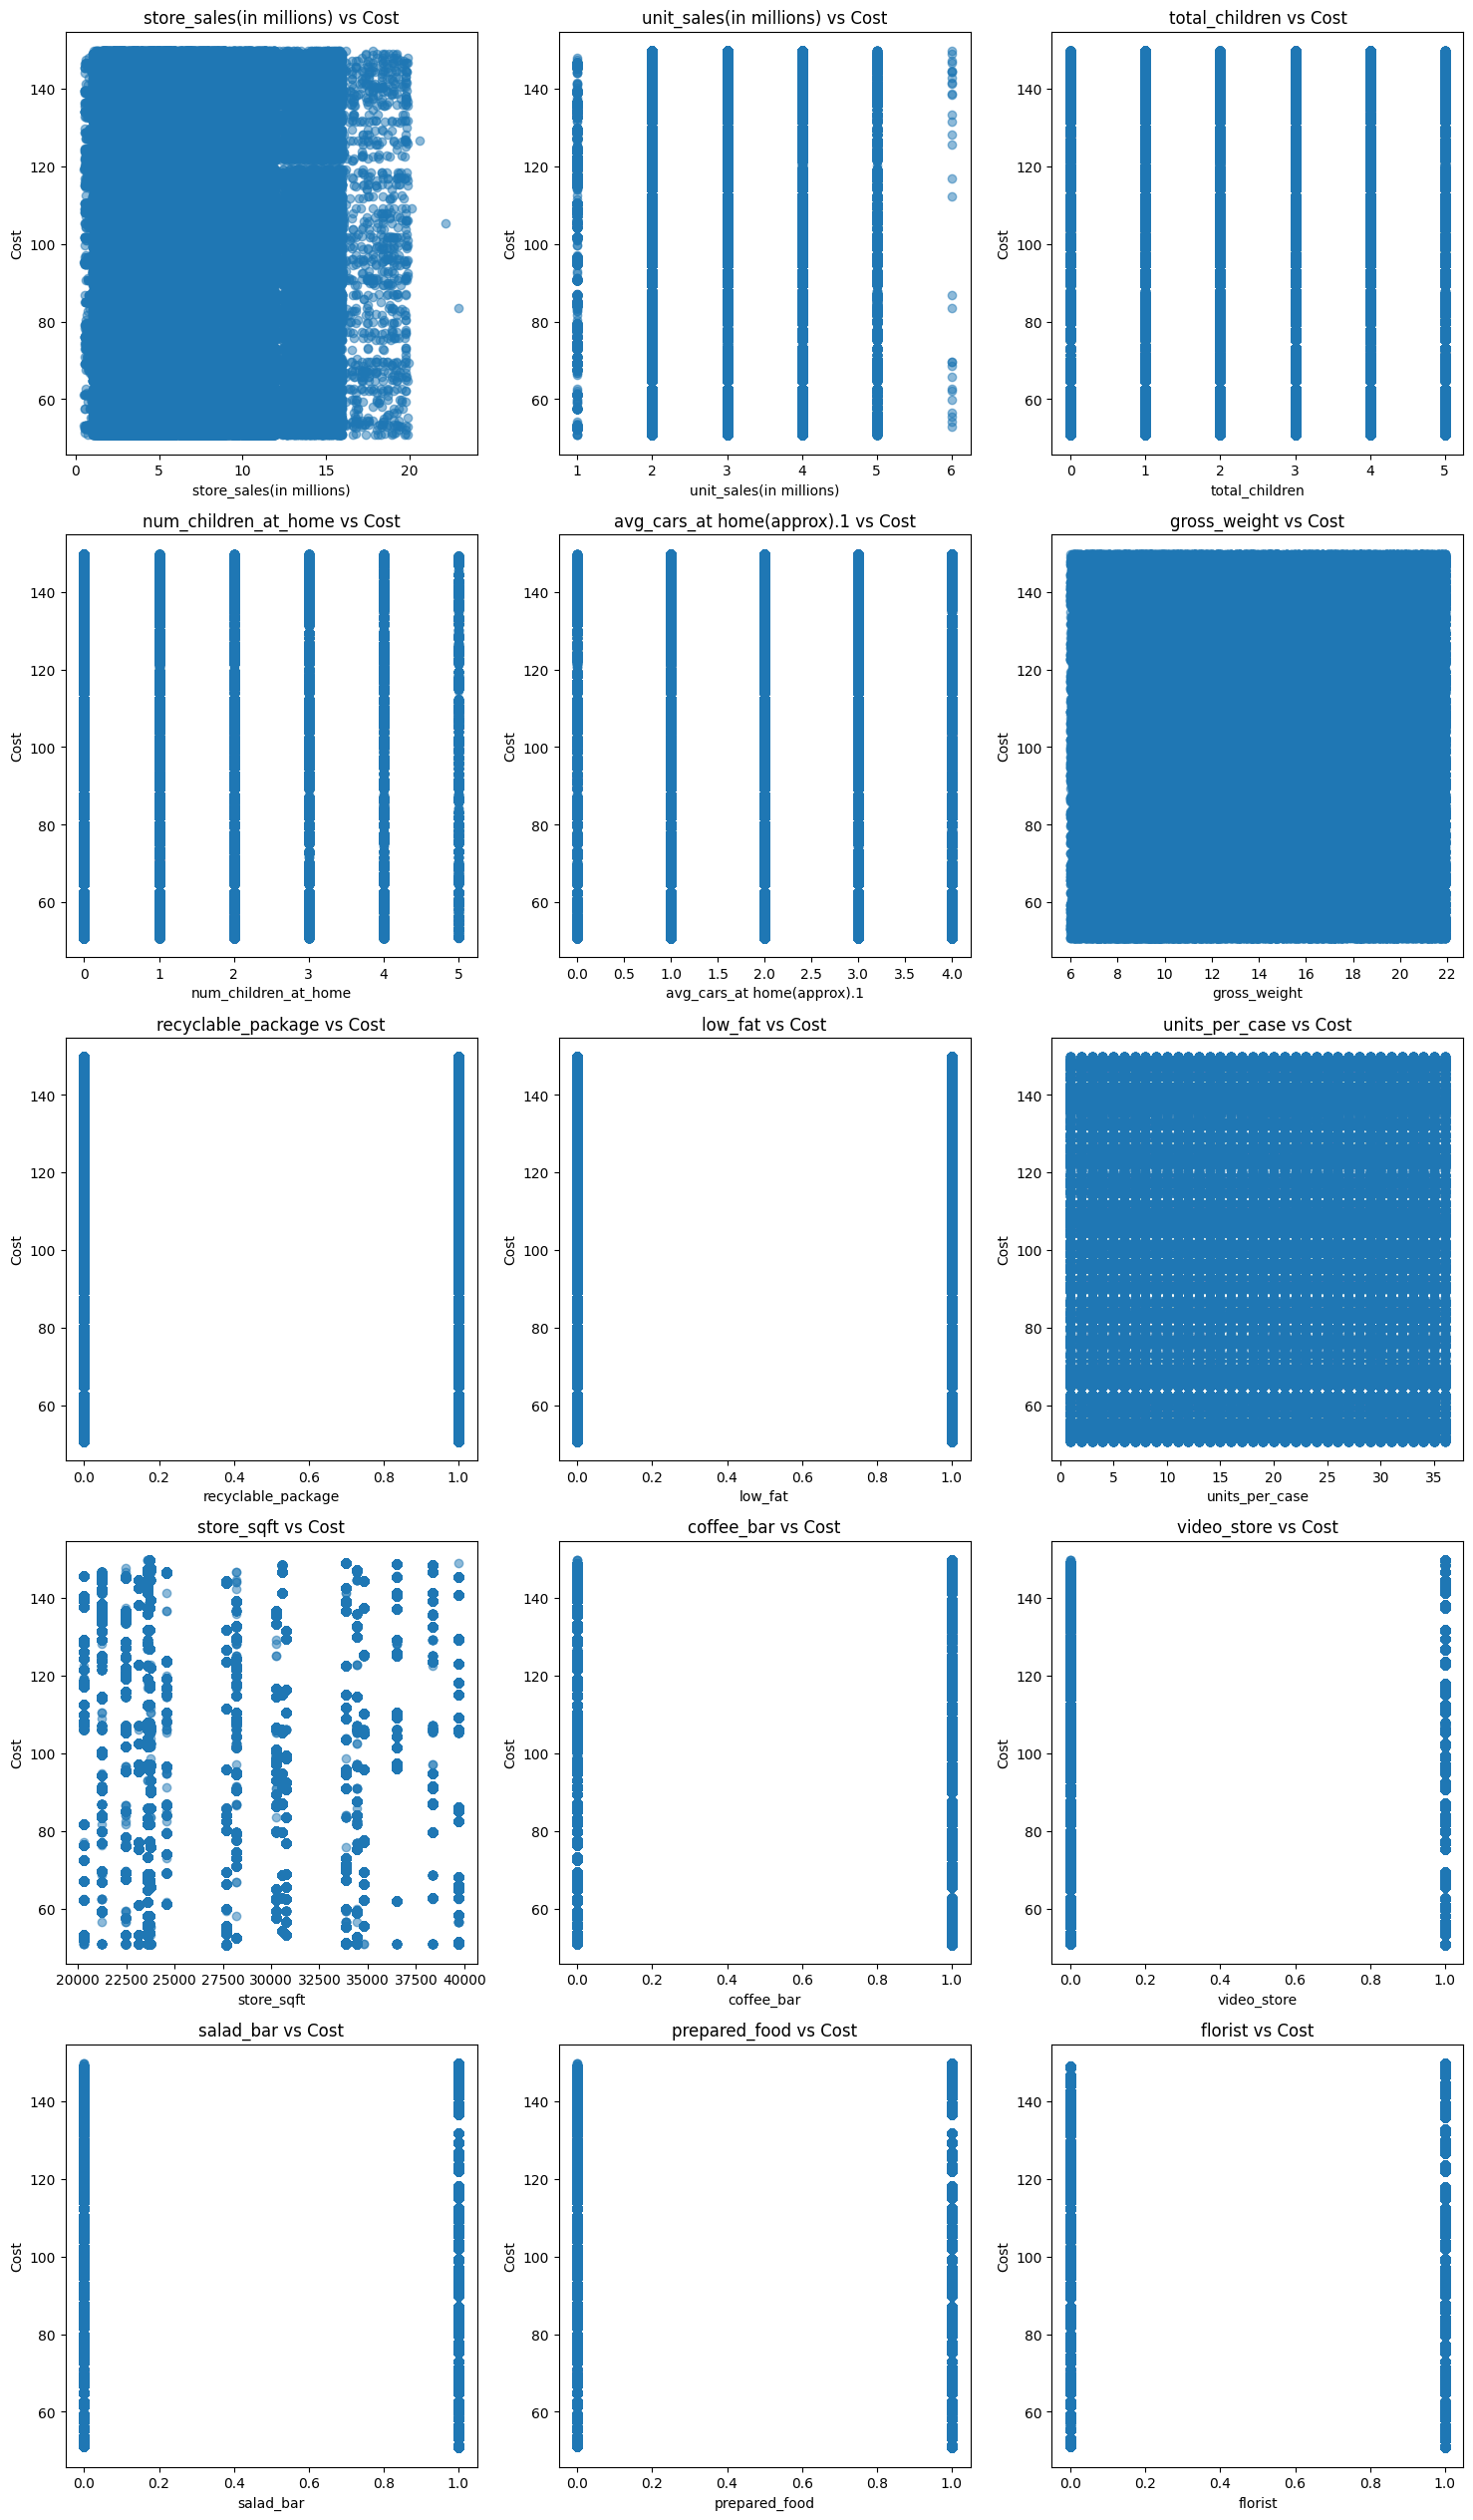

In [6]:
def plot_all_features(X, y):
    num_features = X.shape[1]
    fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
    axes = axes.flatten()
    
    for i, column in enumerate(X.columns):
        axes[i].scatter(X[column], y, alpha=0.5)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Cost")
        axes[i].set_title(f"{column} vs Cost")
    
    for i in range(len(X.columns), len(axes)):
        fig.delaxes(axes[i])  # Remove empty subplots
    
    plt.tight_layout()
    plt.show()

plot_all_features(X, y)

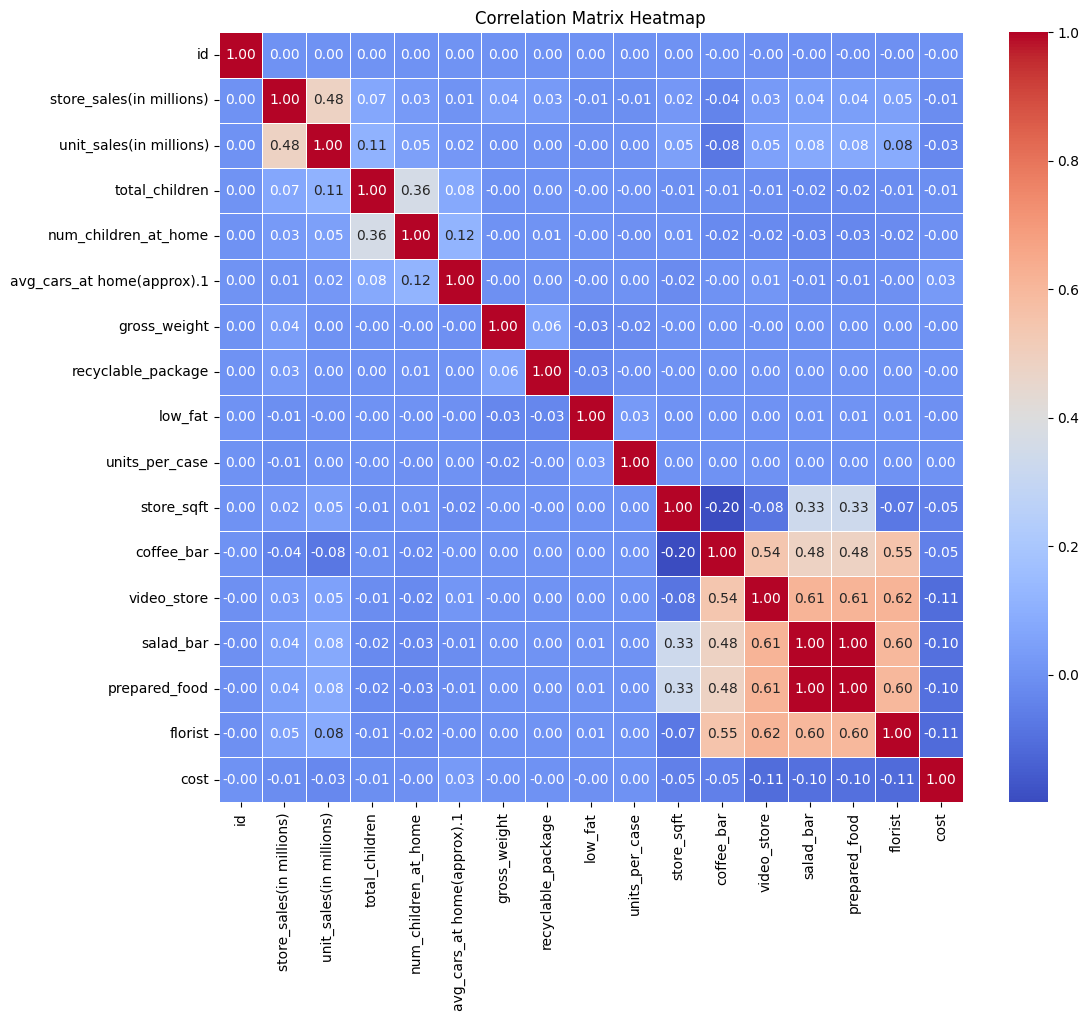

In [9]:
correlation_matrix = train_df.corr()

def plot_correlation_heatmap(corr_matrix):
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

plot_correlation_heatmap(correlation_matrix)

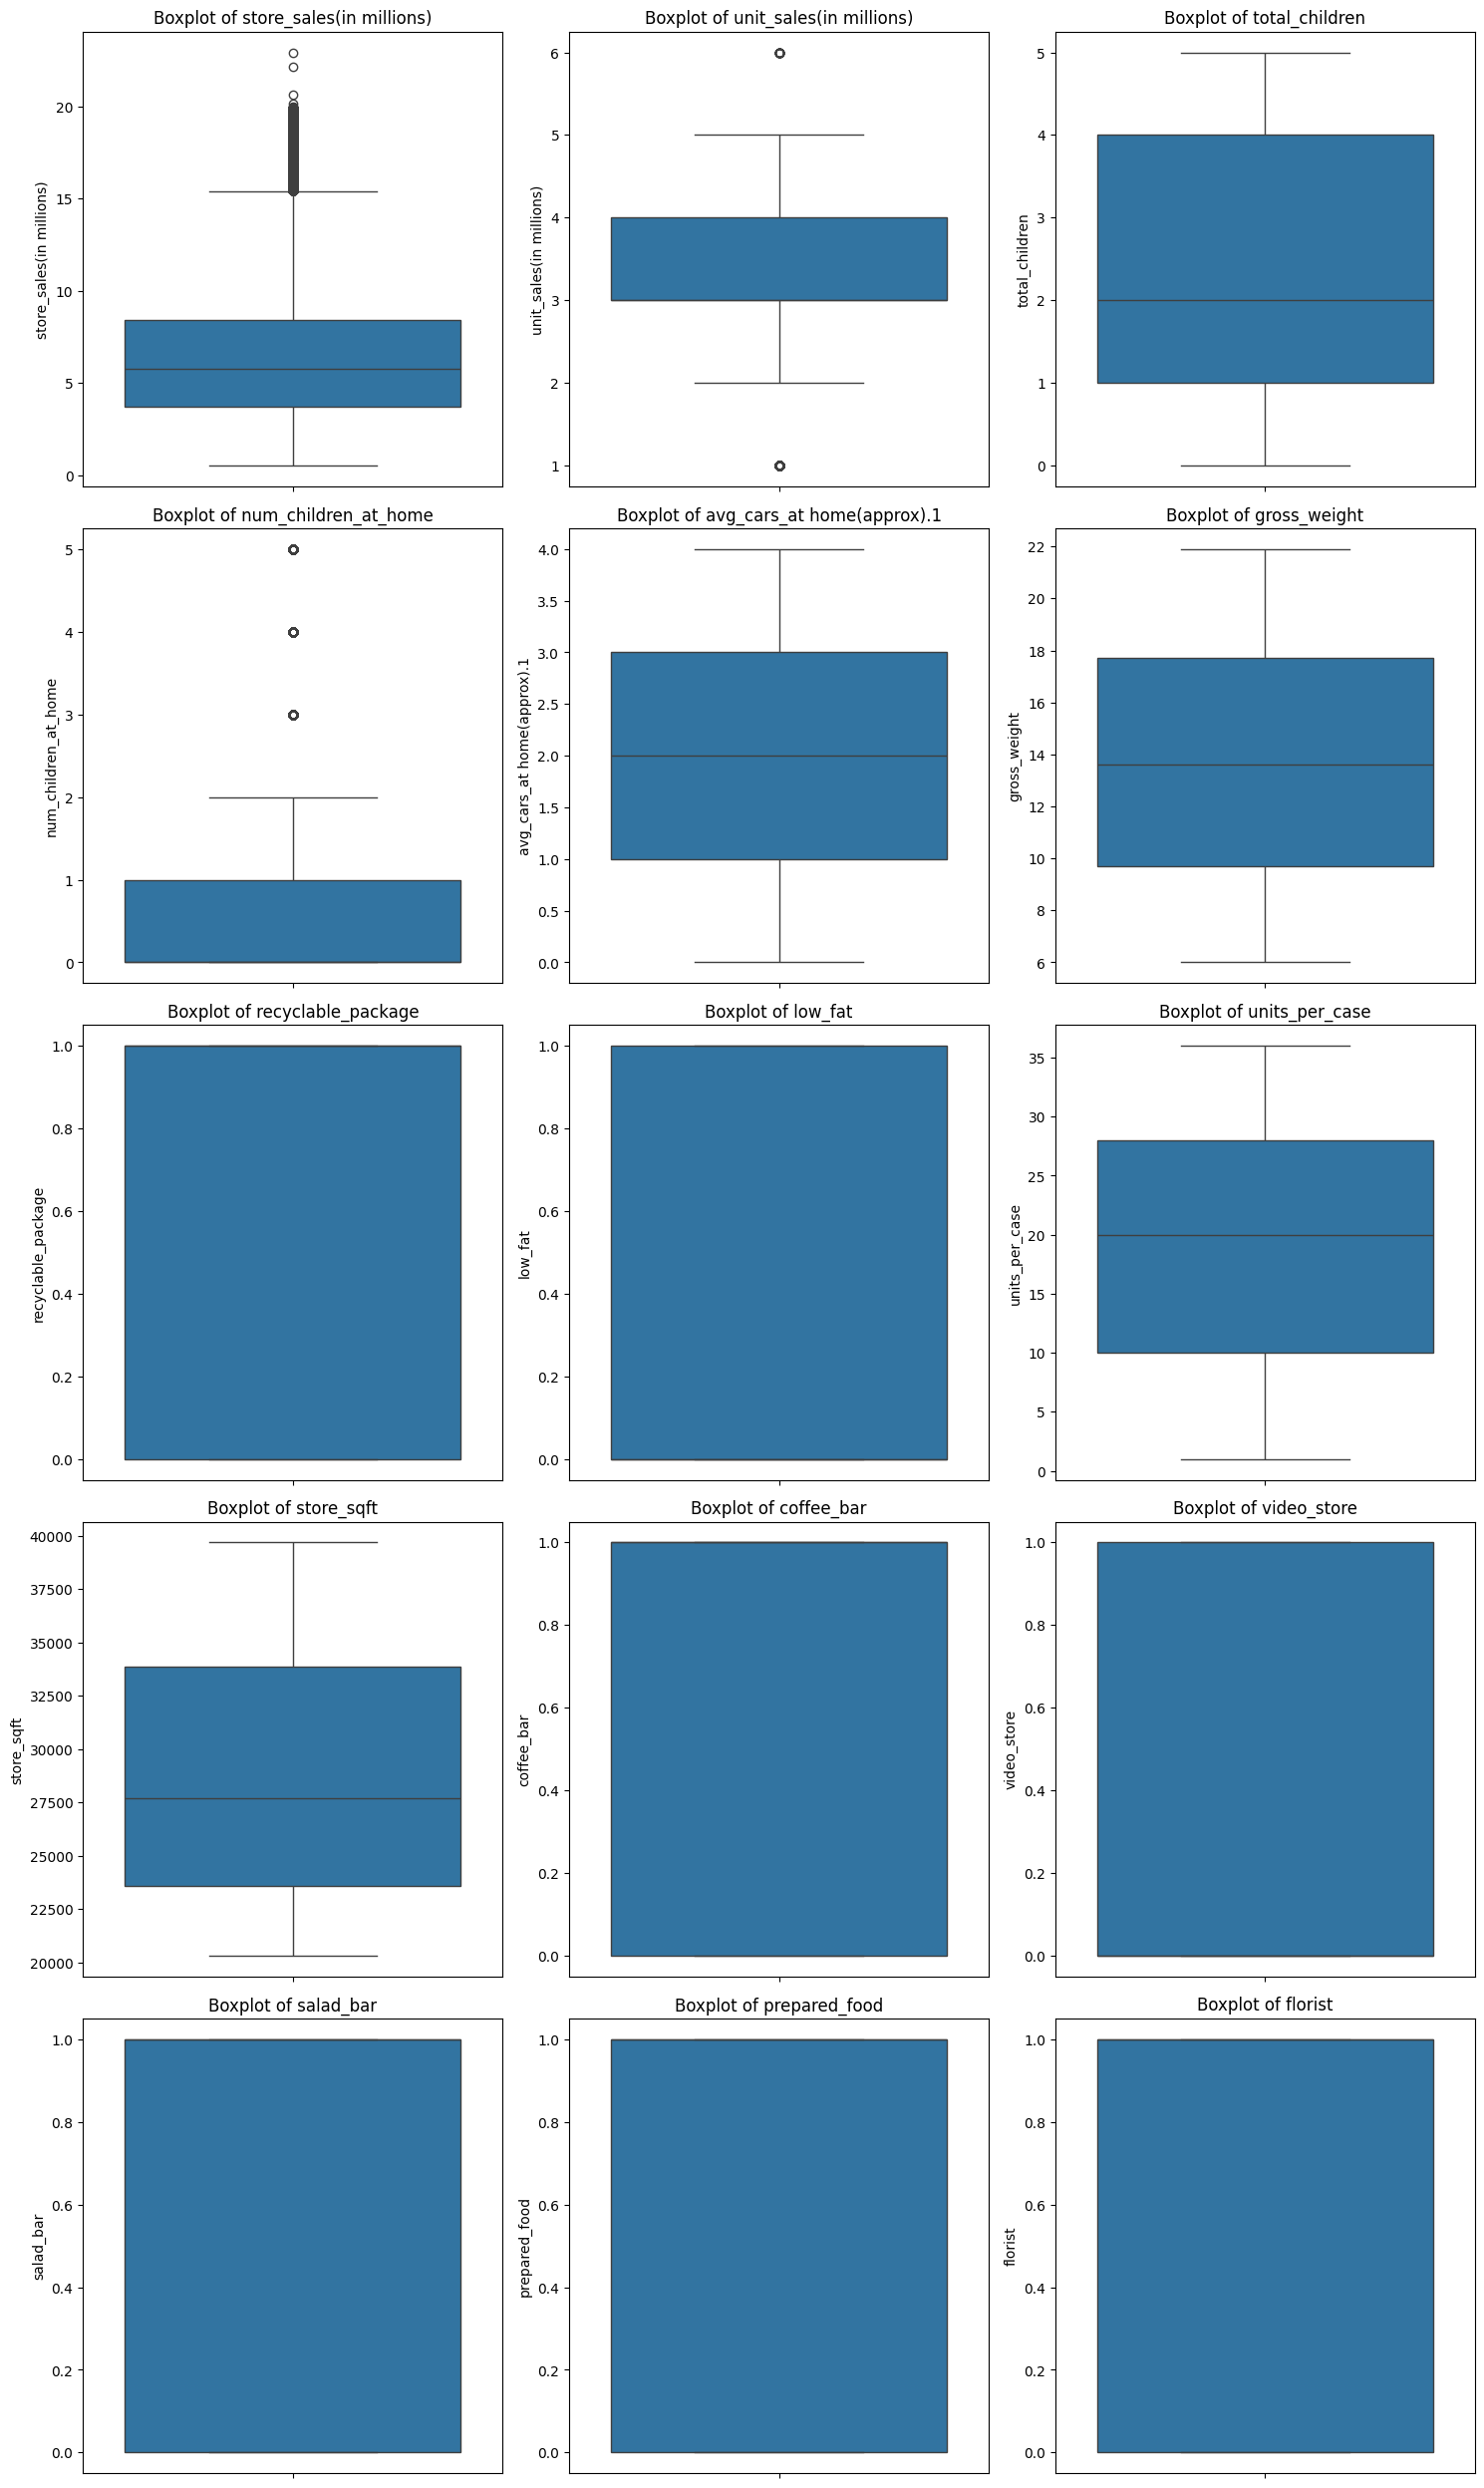

In [10]:
def plot_boxplots(X):
    num_features = X.shape[1]
    fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
    axes = axes.flatten()
    
    for i, column in enumerate(X.columns):
        sns.boxplot(y=X[column], ax=axes[i])
        axes[i].set_title(f"Boxplot of {column}")
    
    for i in range(len(X.columns), len(axes)):
        fig.delaxes(axes[i])  # Remove empty subplots
    
    plt.tight_layout()
    plt.show()

plot_boxplots(X)

## ExtraTreesRegressor Model

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(
   X_train, y_train)
reg.score(X_test, y_test)

-0.020966875138981544